#RFM Analysis: Overview
>RFM Analysis is a concept used by Data Science professionals, especially in the marketing domain for understanding and segmenting customers based on their buying behaviour.
#Using RFM Analysis, a business can assess customers:
>recency (the date they made their last purchase)
>>frequency (how often they make purchases)
>>>and monetary value (the amount spent on purchases)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

# Reading and understanding data


In [3]:
df = pd.read_csv('/content/drive/My Drive/Dataset/rfm_data.csv')

In [ ]:
df.shape

(1000, 6)

In [ ]:
df.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [ ]:
df.tail()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris
999,4759,2023-06-10,804.28,Product D,467544,New York


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
print(df.describe())

        CustomerID  TransactionAmount        OrderID
count  1000.000000         1000.00000    1000.000000
mean   5554.789000          513.67781  554071.398000
std    2605.014863          286.09870  264695.448814
min    1011.000000           12.13000  100096.000000
25%    3273.000000          257.12000  313152.000000
50%    5538.000000          523.56500  564671.500000
75%    7821.750000          759.86000  783052.250000
max    9991.000000          999.44000  999695.000000


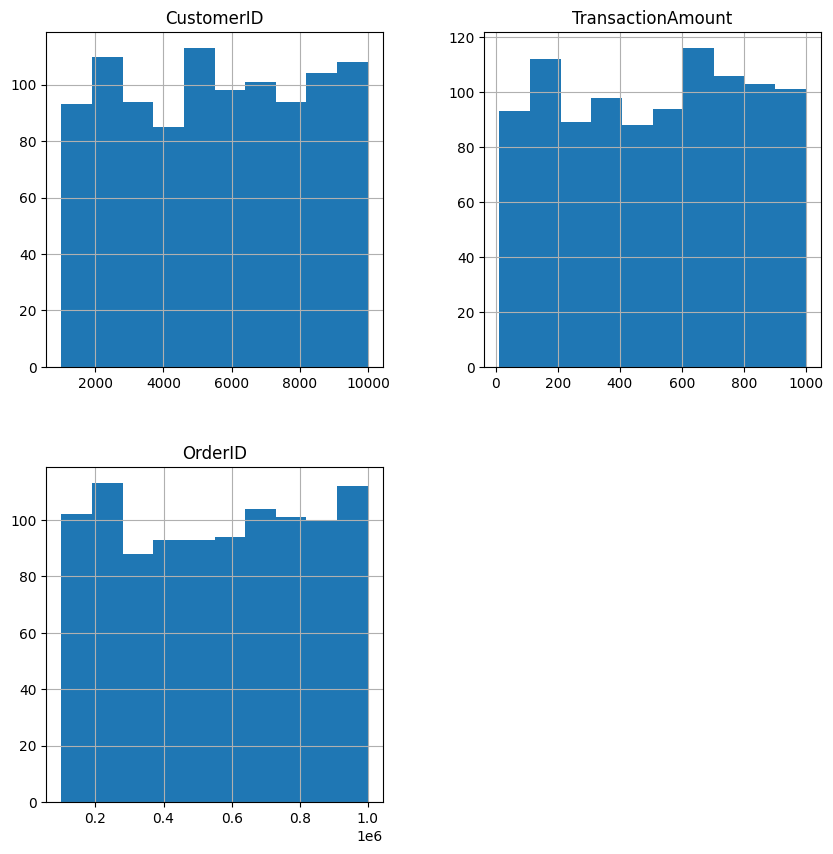

In [ ]:
#check distribution of data
df.hist(figsize=(10,10))
plt.show()

# Cleaning and Processing

In [ ]:
#check null values
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [ ]:
#Check duplication
df.duplicated().sum()

0

In [4]:
#Convert 'PurchaseDate' to datetime
from datetime import datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

#Create New Features

In [5]:
#Recency is the date they made their last purchase
df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date).dt.days

In [6]:
#frequency is Count the total number of purchases made by each customer during a specified period.
frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
df = df.merge(frequency_data, on='CustomerID', how='left')

In [7]:
# Calculate the total monetary value spent by each customer during the specified period.
monetary_data = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
df = df.merge(monetary_data, on='CustomerID', how='left')

In [8]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
df['RecencyScore'] = pd.cut(df['Recency'], bins=5, labels=recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins=5, labels=frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins=5, labels=monetary_scores)

In [9]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

In [10]:
#RFM Value Segmentation
# Calculate RFM score by combining the individual scores
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q=3, labels=segment_labels)

In [11]:
df['Year'] = df['PurchaseDate'].dt.year
df['Month'] = df['PurchaseDate'].dt.month
df['Day'] = df['PurchaseDate'].dt.day


In [12]:
df['Quarter'] = df['PurchaseDate'].dt.quarter

In [13]:
df['DayOfWeek'] = df['PurchaseDate'].dt.dayofweek  # Monday = 0, Sunday = 6

In [14]:
df['IsWeekend'] = df['PurchaseDate'].dt.weekday // 5

In [15]:
#We can categorize purchases into different time periods of the day (e.g., morning, afternoon, evening).
df['TimeOfDay'] = pd.cut(df['PurchaseDate'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

#Univariate Analysis

how many clients do we have?

In [16]:
no_clients = df['CustomerID'].nunique()
print(f'Number of Clients = {no_clients} Client')

Number of Clients = 946 Client


Are there repeat Customers ?

Who are those clients ?

In [18]:
# Count the occurrences of each customer ID
customer_counts = df['CustomerID'].value_counts()

# Find the customer IDs of repeat customers
repeat_customers = customer_counts[customer_counts > 1]

# Print the number of repeat customers
print(f"Number of repeat customers: {len(repeat_customers)}")

# Get the index (customer IDs) of repeat customers
repeat_customer_ids = repeat_customers.index.tolist()

# Print the list of repeat customer IDs
print("List of repeat customer IDs:")
print(repeat_customer_ids)

Number of repeat customers: 51
List of repeat customer IDs:
[7363, 4804, 5557, 1519, 5634, 4943, 9328, 5067, 6617, 3262, 7797, 9824, 3938, 3399, 4401, 3573, 9584, 7793, 2702, 4974, 8216, 1715, 1480, 1011, 4695, 7971, 2494, 4812, 7939, 9564, 7251, 7511, 1803, 9331, 5254, 1305, 4788, 2133, 2741, 1645, 1601, 1920, 8317, 9871, 5583, 7046, 9680, 5933, 9514, 3695, 2526]


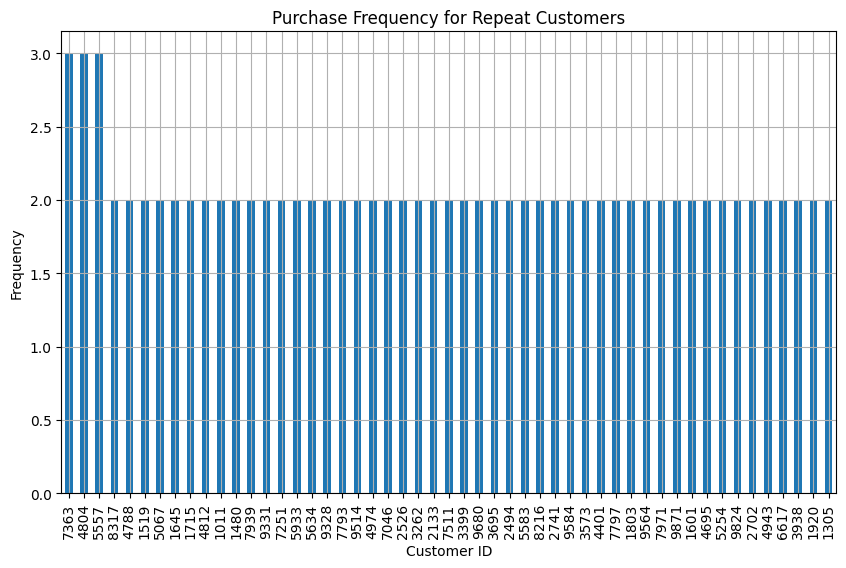

In [19]:
# Get the index (customer IDs) of repeat customers
repeat_customer_ids = repeat_customers.index.tolist()

# Filter rows for repeat customers
repeat_customer_data = df[df['CustomerID'].isin(repeat_customer_ids)]

# Count the purchase occurrences for each repeat customer
purchase_frequency_repeat = repeat_customer_data['CustomerID'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
purchase_frequency_repeat.plot(kind='bar')
plt.title('Purchase Frequency for Repeat Customers')
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
total_non_repeat_customers = df['CustomerID'].nunique() - len(repeat_customers)

print(f"Total number of non-repeat customers: {total_non_repeat_customers}")

Total number of non-repeat customers: 895


#Some information about date and time

In [21]:
Year = df['Year'].unique()
print(f"Data recorded in {Year}")

# Find the minimum and maximum dates
min_date = df['PurchaseDate'].min()
max_date = df['PurchaseDate'].max()

print(f"Data recorded from: {min_date} to {max_date}")

Data recorded in [2023]
Data recorded from: 2023-04-11 00:00:00 to 2023-06-10 00:00:00


In [22]:
# Filter data for the specified time range
start_date = pd.Timestamp('2023-04-11')
end_date = pd.Timestamp('2023-06-10')
filtered_data = df[(df['PurchaseDate'] >= start_date) & (df['PurchaseDate'] <= end_date)]

# Calculate the most common month
most_common_month = filtered_data['Month'].value_counts().idxmax()

# For each month, calculate the most common day
most_common_day_per_month = filtered_data.groupby('Month')['Day'].apply(lambda x: x.value_counts().idxmax())

print(f"Most common month: {most_common_month}")
print("Most common day in each month:")
for month, day in most_common_day_per_month.items():
    print(f"Month {month}: Day {day}")

Most common month: 5
Most common day in each month:
Month 4: Day 21
Month 5: Day 4
Month 6: Day 5


In [23]:
# List of months you want to analyze
months_to_analyze = [4, 5, 6]

# Iterate through the months and calculate day frequencies
for month in months_to_analyze:
    day_frequency_per_month = df[df['Month'] == month].groupby('Month')['Day'].value_counts()
    print(f"Month {month} - Day Frequencies:")
    print(day_frequency_per_month)
    print("\n")


Month 4 - Day Frequencies:
Month  Day
4      13     23
       21     23
       27     23
       29     21
       30     21
       26     20
       12     19
       24     19
       25     19
       14     18
       17     18
       28     18
       16     16
       19     15
       15     14
       18     13
       22     13
       23     12
       11      8
       20      8
Name: Day, dtype: int64


Month 5 - Day Frequencies:
Month  Day
5      4      27
       29     24
       10     23
       2      22
       1      21
       27     21
       28     21
       5      19
       6      19
       22     19
       31     19
       7      18
       19     18
       9      17
       11     17
       24     17
       26     17
       13     16
       16     16
       25     16
       3      15
       23     15
       20     14
       30     14
       17     13
       8      12
       14     10
       15     10
       18      9
       21      9
       12      7
Name: Day, dtype: int64


Month

In [ ]:
# Calculate maximum, minimum, and average transaction amount
max_amount = df['TransactionAmount'].max()
min_amount = df['TransactionAmount'].min()
avg_amount = df['TransactionAmount'].mean()

print(f"Maximum Transaction Amount: {max_amount}")
print(f"Minimum Transaction Amount: {min_amount}")
print(f"Average Transaction Amount: {avg_amount}")

Maximum Transaction Amount: 999.44
Minimum Transaction Amount: 12.13
Average Transaction Amount: 513.67781


In [ ]:
df['ProductInformation'].value_counts()

Product C    277
Product D    253
Product B    245
Product A    225
Name: ProductInformation, dtype: int64

In [ ]:
df['Location'].value_counts()

Tokyo       278
New York    247
London      246
Paris       229
Name: Location, dtype: int64

In [ ]:
value_counts = df['Value Segment'].value_counts()


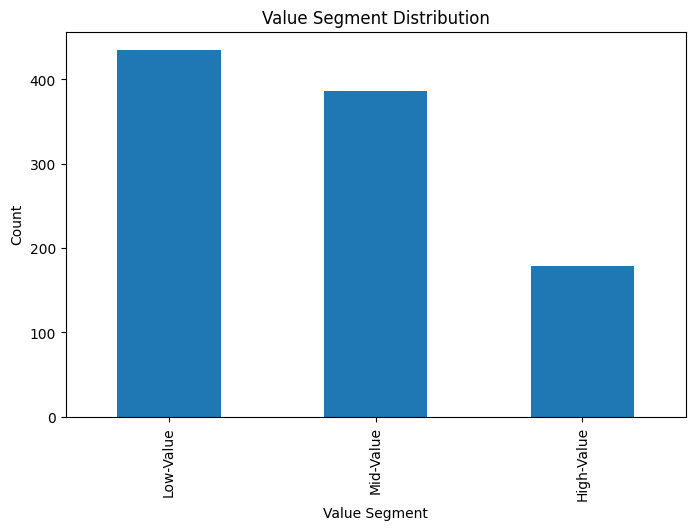

In [ ]:
# Create a bar plot
plt.figure(figsize=(8, 5))
value_counts.plot(kind='bar')
plt.title('Value Segment Distribution')
plt.xlabel('Value Segment')
plt.ylabel('Count')
plt.show()

#Bivariate Analysis

Transaction Amount vs. Value Segment:
>.1.How does the transaction amount vary across different value segments?


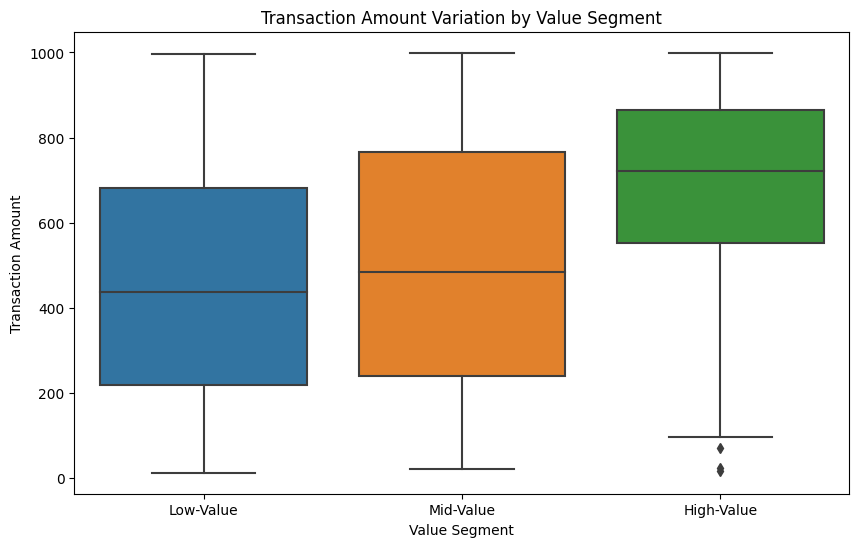

In [ ]:
# Create a box plot or violin plot to visualize transaction amounts by value segment
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Value Segment', y='TransactionAmount')
plt.title('Transaction Amount Variation by Value Segment')
plt.xlabel('Value Segment')
plt.ylabel('Transaction Amount')
plt.show()

Location vs. Value Segment:

Is there a relationship between the customer's location and their assigned value segment?

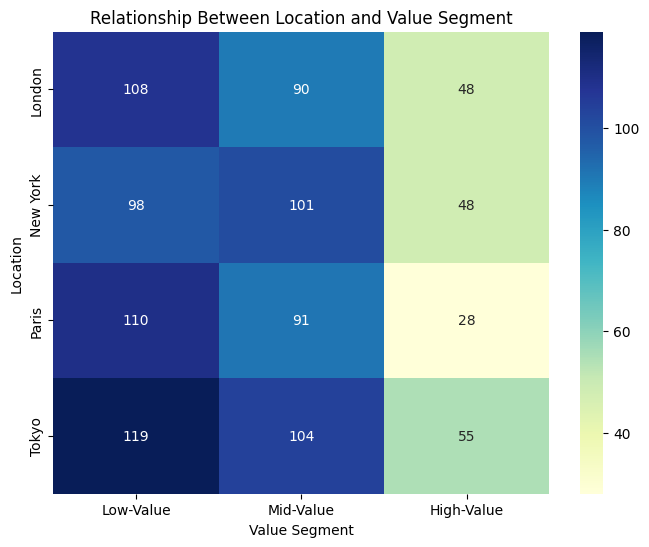

In [ ]:
# Create a cross-tabulation or contingency table
cross_table = pd.crosstab(df['Location'], df['Value Segment'])

# Create a heatmap to visualize the relationship between location and value segment
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relationship Between Location and Value Segment')
plt.xlabel('Value Segment')
plt.ylabel('Location')
plt.show()

Are customers who have higher recency scores also likely to have higher frequency scores?

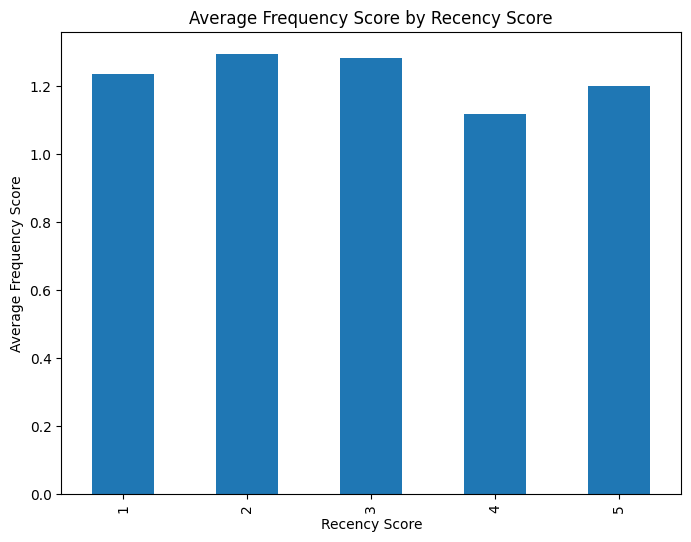

In [ ]:
# Calculate the average frequency score for each recency score category
avg_frequency_by_recency = df.groupby('RecencyScore')['FrequencyScore'].mean()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
avg_frequency_by_recency.plot(kind='bar')
plt.title('Average Frequency Score by Recency Score')
plt.xlabel('Recency Score')
plt.ylabel('Average Frequency Score')
plt.show()


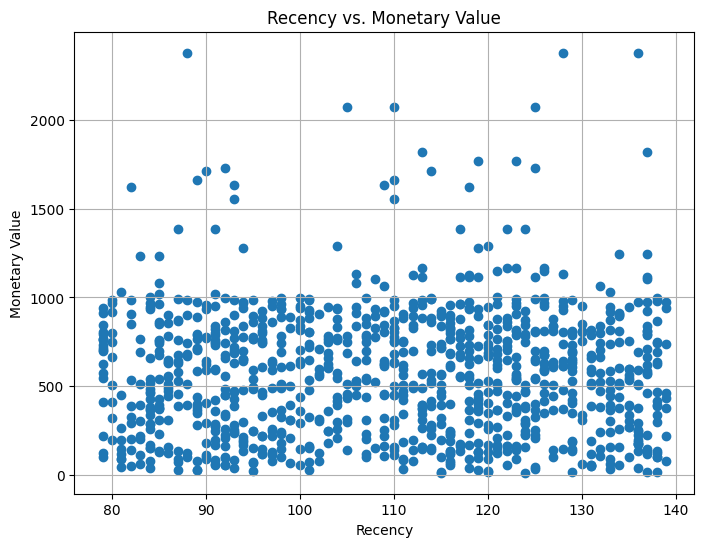

Correlation coefficient between Recency and Monetary Value: 0.02


In [ ]:
# Create a scatter plot to visualize the relationship between recency and monetary value
plt.figure(figsize=(8, 6))
plt.scatter(df['Recency'], df['MonetaryValue'])
plt.title('Recency vs. Monetary Value')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df['Recency'].corr(df['MonetaryValue'])
print(f"Correlation coefficient between Recency and Monetary Value: {correlation:.2f}")

In [27]:
# Create a new column for RFM Customer Segments
df['RFM Customer Segments'] = ''

# Assign RFM segments based on the RFM score
df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = "Can't Lose"
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
print(df[['CustomerID', 'RFM Customer Segments']])

     CustomerID RFM Customer Segments
0          8814            Can't Lose
1          2188                  Lost
2          4608                  Lost
3          2559                  Lost
4          9482            Can't Lose
..          ...                   ...
995        2970   Potential Loyalists
996        6669   Potential Loyalists
997        8836   Potential Loyalists
998        1440   Potential Loyalists
999        4759   Potential Loyalists

[1000 rows x 2 columns]


#Analyzing the distribution of customers across different RFM customer segments within each value segment:

In [29]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name='Count')

segment_product_counts = segment_product_counts.sort_values('Count', ascending=False)

fig_treemap_segment_product = px.treemap(segment_product_counts,
                                         path=['Value Segment', 'RFM Customer Segments'],
                                         values='Count',
                                         color='Value Segment', color_discrete_sequence=px.colors.qualitative.Pastel,
                                         title='RFM Customer Segments by Value')
fig_treemap_segment_product.show()

#Now let’s analyze the distribution of RFM values within the Champions segment:



In [30]:
# Filter the data to include only the customers in the Champions segment
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

fig = go.Figure()
fig.add_trace(go.Box(y=champions_segment['RecencyScore'], name='Recency'))
fig.add_trace(go.Box(y=champions_segment['FrequencyScore'], name='Frequency'))
fig.add_trace(go.Box(y=champions_segment['MonetaryScore'], name='Monetary'))

fig.update_layout(title='Distribution of RFM Values within Champions Segment',
                  yaxis_title='RFM Value',
                  showlegend=True)

fig.show()

#Now let’s analyze the correlation of the recency, frequency, and monetary scores within the champions segment:

In [31]:
correlation_matrix = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].corr()

# Visualize the correlation matrix using a heatmap
fig_heatmap = go.Figure(data=go.Heatmap(
                   z=correlation_matrix.values,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='RdBu',
                   colorbar=dict(title='Correlation')))

fig_heatmap.update_layout(title='Correlation Matrix of RFM Values within Champions Segment')

fig_heatmap.show()